In [1]:
library(cpop)

Loading required package: crops

Registered S3 method overwritten by 'ggplot2':
  method        from
  print.element sets

Loading required package: pacman


Attaching package: ‘cpop’


The following objects are masked from ‘package:stats’:

    fitted, simulate


The following object is masked from ‘package:methods’:

    show




## Section 4.5

### crops

In [13]:
##example 1 -- unknown variance -- return to example from Section 4.1
set.seed(1)
x <- (1:50/5)^2
y <- 2*simulate(x,changepoints=c(10,50),change.slope=c(0.25,-0.25),sigma=1)
mu <- simulate(x,changepoints=c(10,50),change.slope=c(0.25,-0.25),sigma=0)

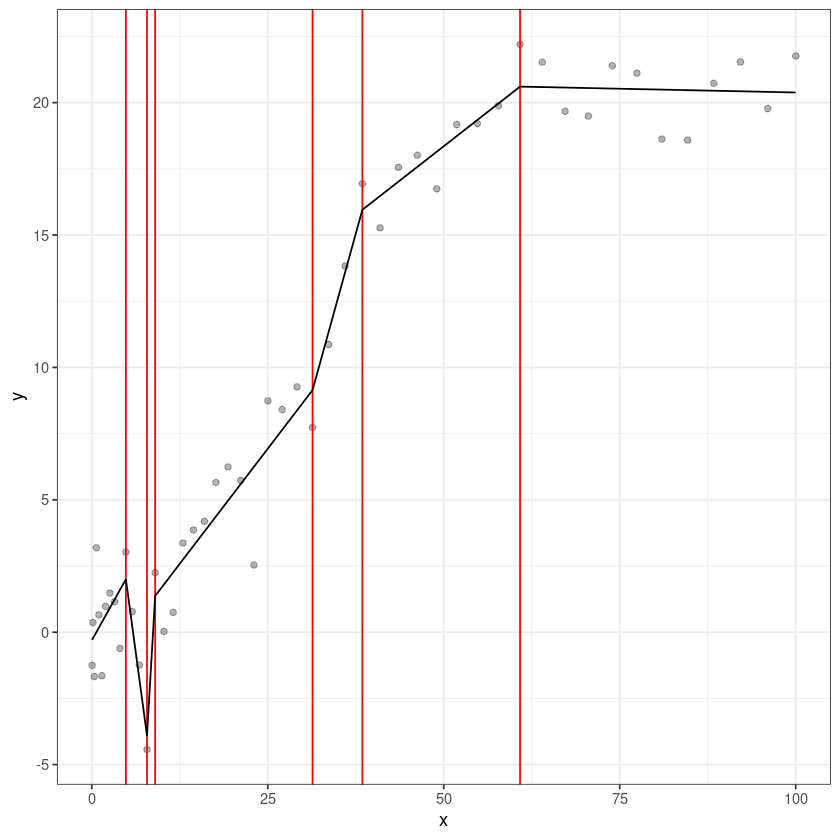

In [14]:
res=cpop(y,x,beta=2*log(length(y)))
p <- plot(res) 
print(p)

In [15]:
library(ggplot2)
ggsave("unknown-variance.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



#### notes - PF

Can the crops function remove duplicate rows (same value of m) before output.

#### notes - DG

Yes - there is a function __unique__ for doing this (see below). I can the cpop.crops do this automatically if you would prefer.

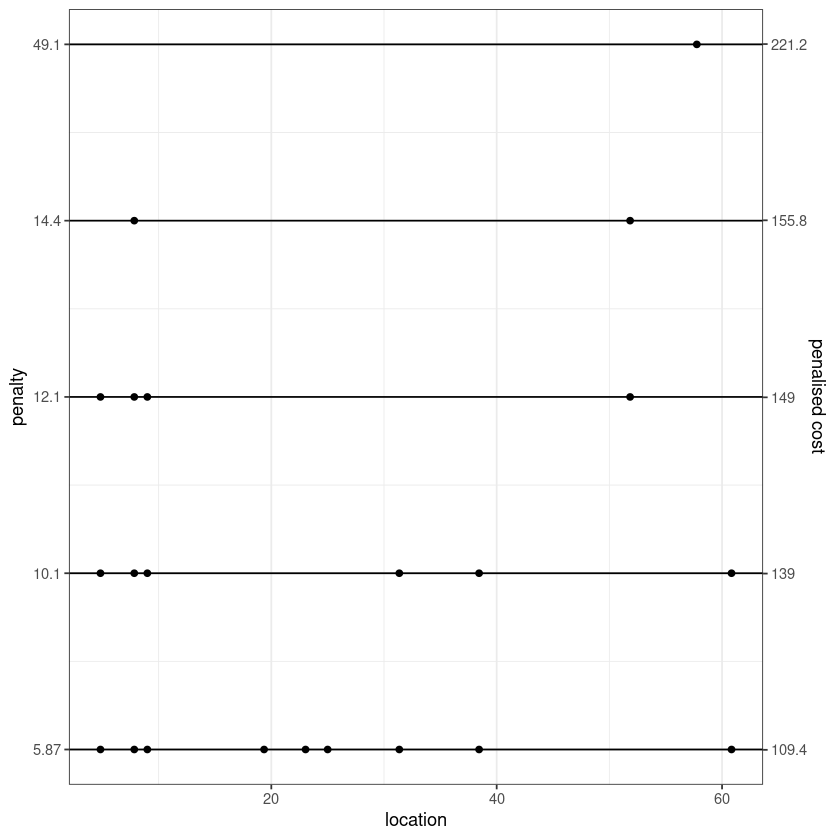

In [11]:
res.crops <- cpop.crops(y,x,beta_min=1.5*log(length(y)),beta_max=100*log(length(y)))
p <- plot(res.crops)
print(p)

In [12]:
library(ggplot2)
ggsave("unknown-vaiance-crops.jpg",plot=p,device="jpeg")

Saving 6.67 x 6.67 in image



In [6]:
segs <- segmentations(res.crops)
print(segs)

        beta        Qm        Q m cpt.1 cpt.2 cpt.3 cpt.4 cpt.5 cpt.6 cpt.7
1   5.868035  56.55849 109.3708 9  4.84  7.84     9 19.36 23.04 25.00 31.36
2  10.058724  78.66769 139.0200 6  4.84  7.84     9 31.36 38.44 60.84    NA
3  12.075466 100.68148 148.9833 4  4.84  7.84     9 51.84    NA    NA    NA
4  14.436207 126.96956 155.8420 2  7.84 51.84    NA    NA    NA    NA    NA
5  49.133969 172.04815 221.1821 1 57.76    NA    NA    NA    NA    NA    NA
6 391.202301 498.76421 498.7642 0    NA    NA    NA    NA    NA    NA    NA
  cpt.8 cpt.9
1 38.44 60.84
2    NA    NA
3    NA    NA
4    NA    NA
5    NA    NA
6    NA    NA


### calculate the residuals

#### notes - PF

I WOULD LIKE TO (i) LOOP OVER THE UNIQUE SEGMENTATIONS; CALCULATE THE RESIDUALS
AND LOOK AT n*log(mean(residuals^2))+2*m*log(n) -- for K changepoints.
M=length(segs[,1])

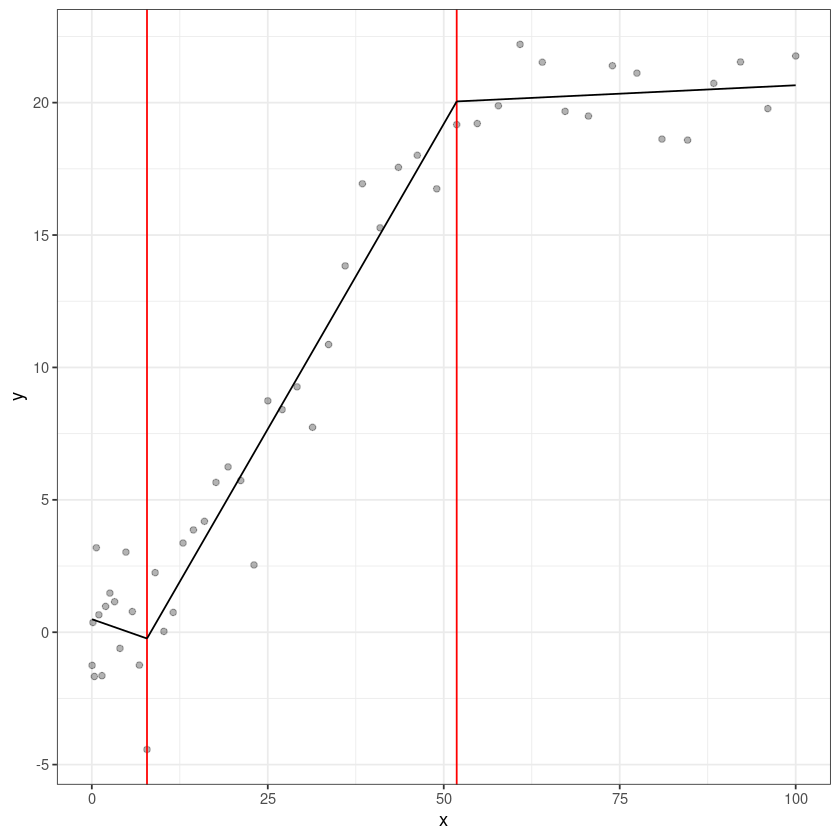

In [7]:
M <- length(segs[,1])
BIC <- rep(NA,M)
n <- length(y)
for(i in 1:M){
  ##IS THERE A BETTER WAY OF GETTING THE RESIDUALS -- THEN RE-RUNNING CPOP?
  res <- cpop(y,x,beta=segs[i,1])
  BIC[i] <- n*log(mean((residuals(res))^2))+2*segs[i,4]*log(n)
}
i <- which.min(BIC)
res <- cpop(y,x,beta=segs[i,1])
plot(res)

#### notes - DG

I have added a function to extract the models created __cpop.crops__. See below for examples.

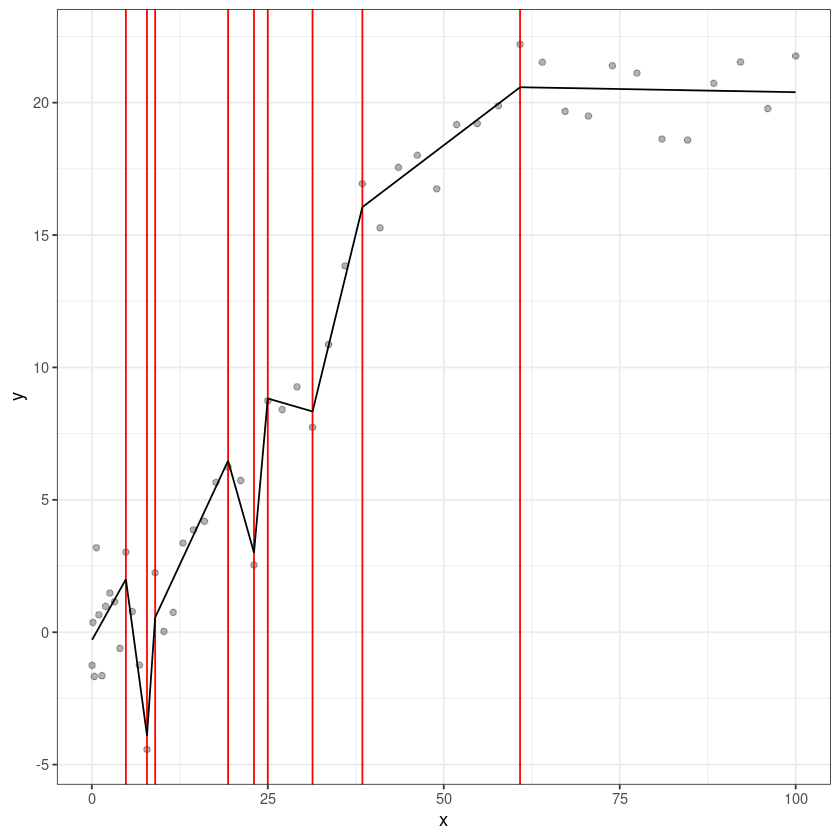

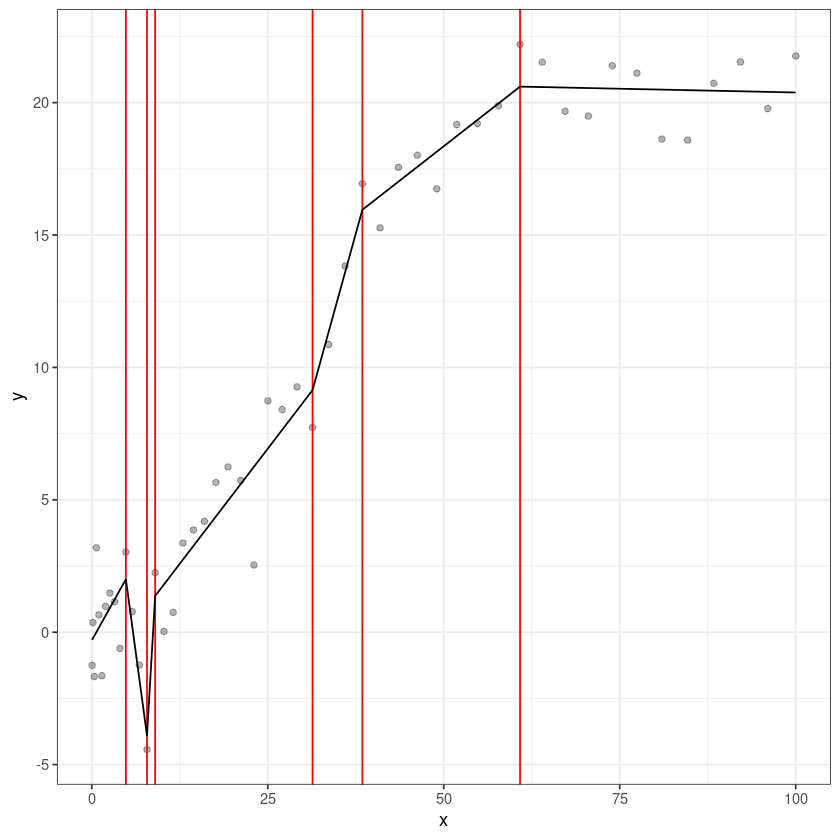

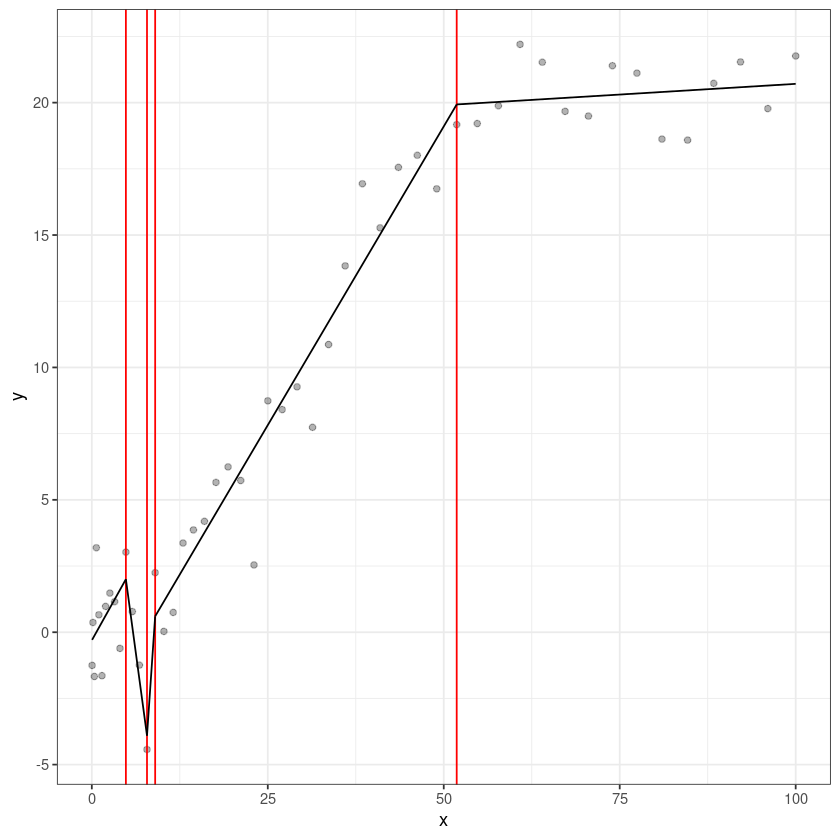

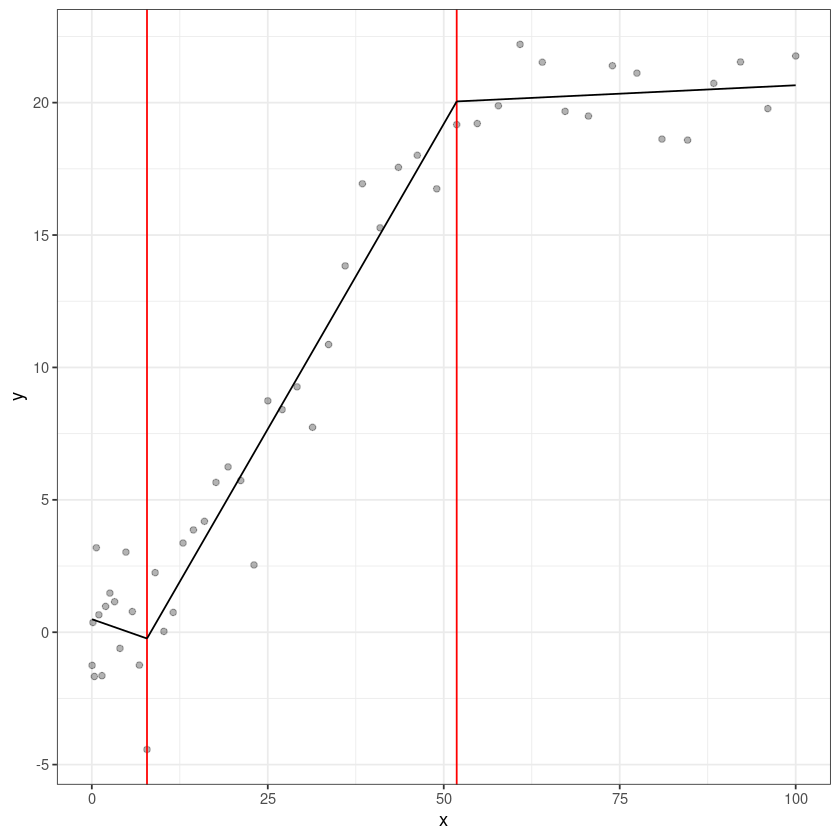

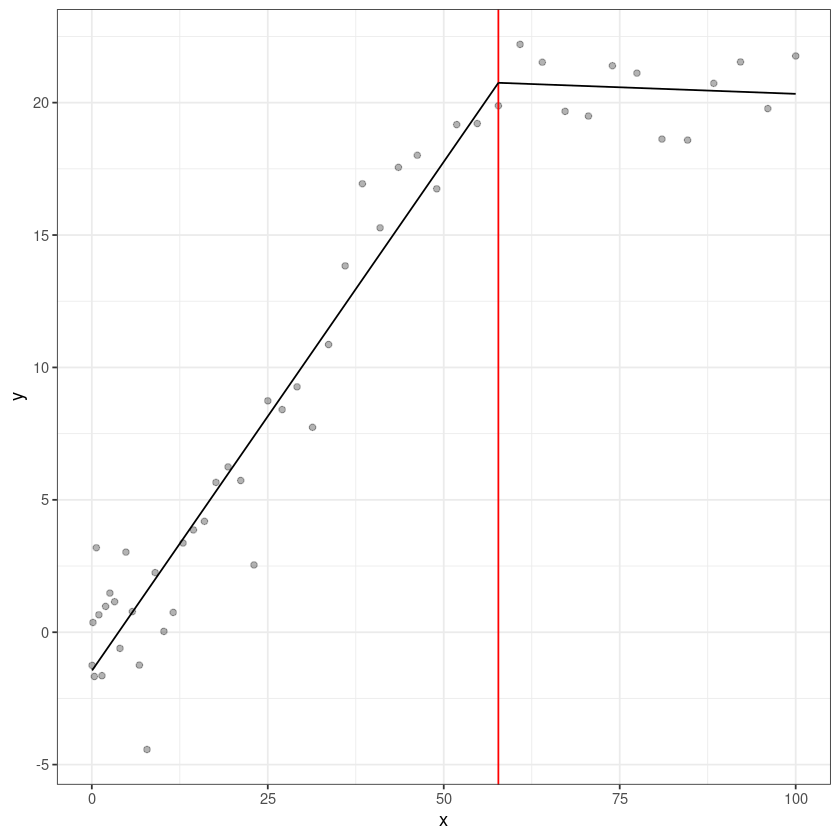

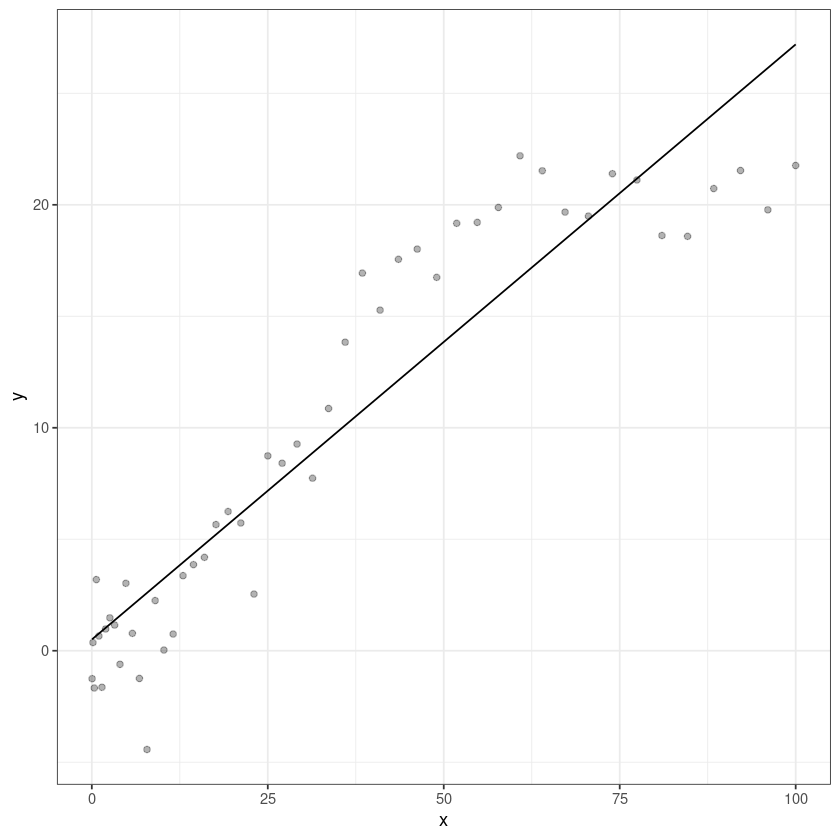

In [8]:
models <- cpop.crops.models(res.crops)
for(m in models)
    {
      print(plot(m))
    }

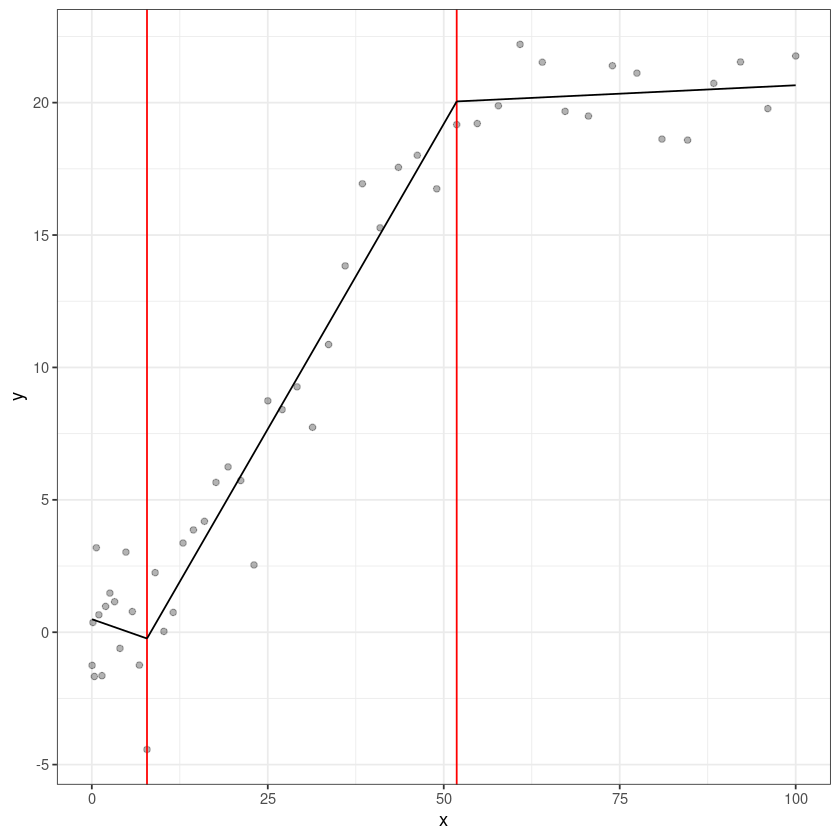

In [9]:
library(magrittr)
BIC <- function(model)
{
  n <- length(model@y) 
  lhs <- . %>% residuals %>% .^2 %>% mean %>% log
  rhs <- . %>% changepoints %>% nrow   
  return(n*lhs(model) + 2*rhs(model)*log(n))    
}
    
min.pos <- res.crops %>% cpop.crops.models %>% Map(BIC,.) %>% which.min 
res.crops %>% cpop.crops.models %>% .[[min.pos]] %>% plot

###  heterogeneous example

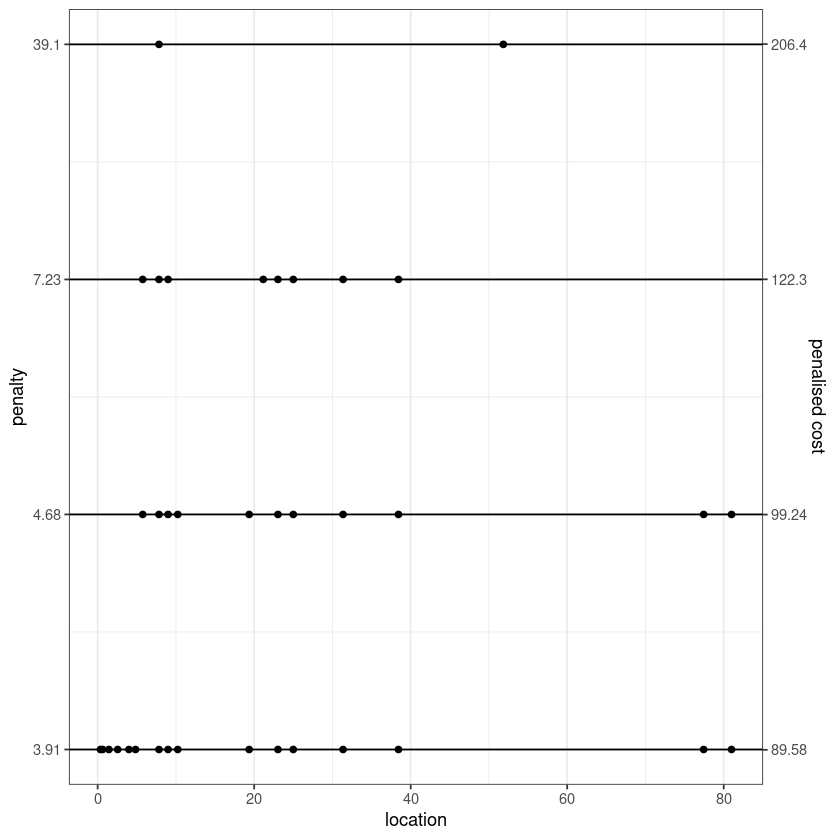

In [10]:
set.seed(1)
sigma <- (1:50)/25
y <- simulate(x,changepoints=c(10,50),change.slope=c(0.25,-0.25),sigma=sigma)
res.crops <- cpop.crops(y,x,sd=(1:50)/50,beta_min=log(length(y)),beta_max=10*log(length(y)))
plot(res.crops)

### correlated noise

In [11]:
set.seed(1)
n <- 500
x <- 1:n
m <- 10
mu <- simulate(x,changepoints=(n/(m+1))*0:m,change.slope=c(0.1,0.2*(-1)^(1:m)),sigma=0)
epsilon <- rnorm(n+2)
y <- mu+(epsilon[1:n]+epsilon[2:(n+1)]+epsilon[3:(n+2)])/sqrt(3)

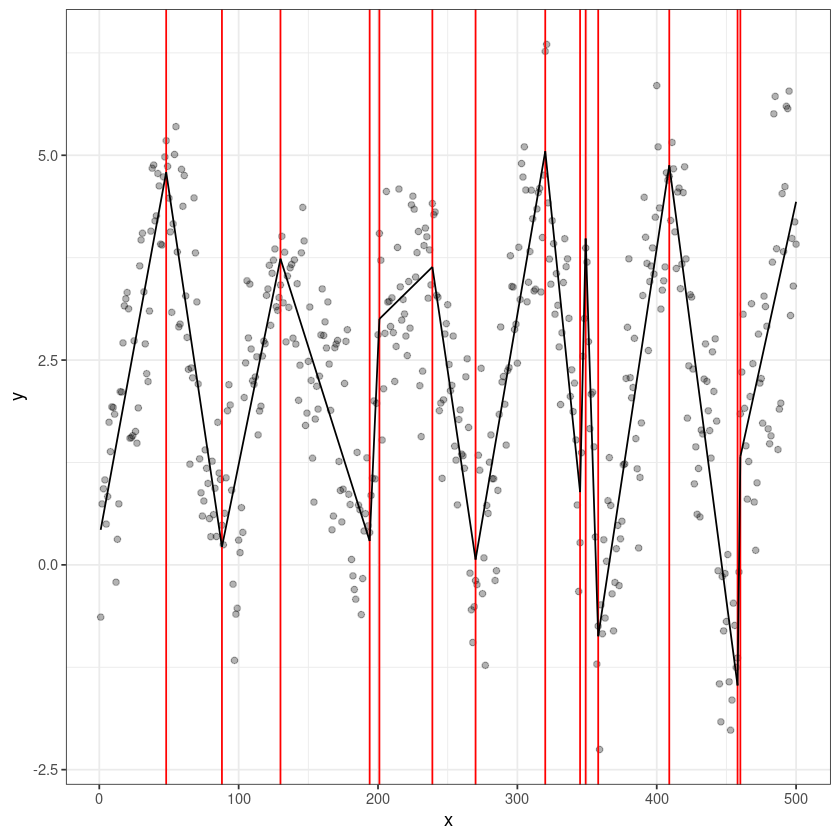

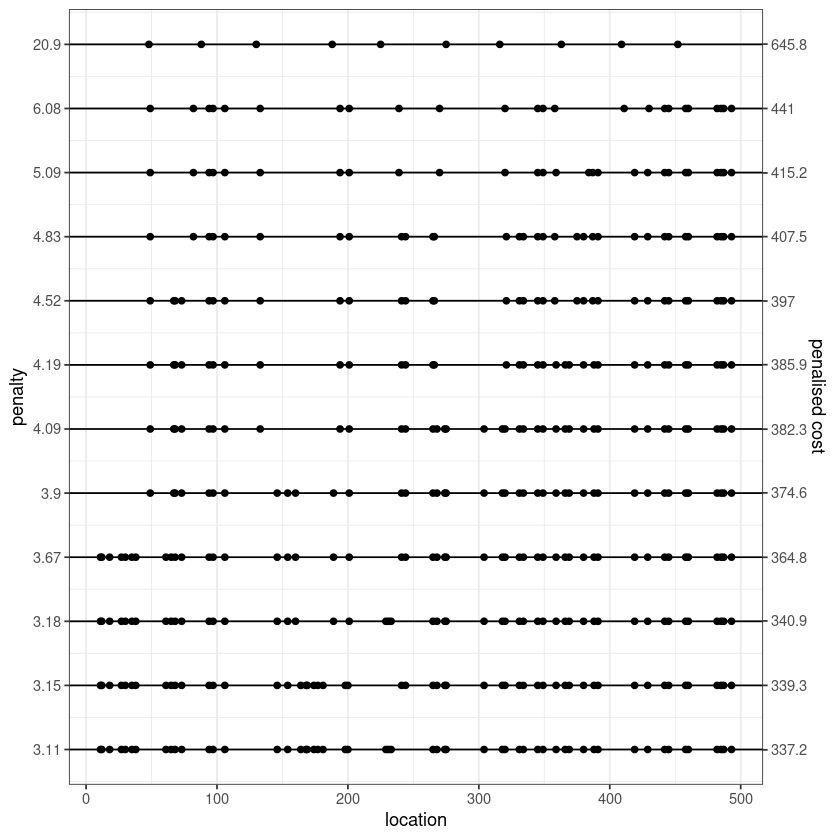

In [13]:
res <- cpop(y,x,beta=2*log(length(y)))
plot(res)
res.crops <- cpop.crops(y,x,beta_min=0.5*log(length(y)),beta_max=40*log(length(y)))
plot(res.crops)

In [14]:
length(cpop.crops.models(res.crops)[[1]]@changepoints)
nrow(changepoints(cpop.crops.models(res.crops)[[1]]))

[1] 56

[1] 54

In [15]:
segs <- segmentations(res.crops)
segs

beta,Qm,Q,m,cpt.1,cpt.2,cpt.3,cpt.4,cpt.5,cpt.6,⋯,cpt.45,cpt.46,cpt.47,cpt.48,cpt.49,cpt.50,cpt.51,cpt.52,cpt.53,cpt.54
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.107304,169.3910,337.1854,54,11,12,18,27,30,35,⋯,419,429,442,445,458,460,482,485,487,493
3.147682,172.5174,339.3445,53,11,12,18,27,30,35,⋯,429,442,445,458,460,482,485,487,493,NA
3.178098,185.1294,340.8562,49,11,12,18,27,30,35,⋯,460,482,485,487,493,NA,NA,NA,NA,NA
3.673728,188.4596,364.7985,48,11,12,18,27,30,35,⋯,482,485,487,493,NA,NA,NA,NA,NA,NA
3.902480,214.6462,374.6479,41,49,67,68,73,94,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.090932,222.7475,382.2939,39,49,67,68,73,94,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.192022,239.1918,385.9126,35,49,67,68,73,94,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.516991,243.4032,396.9809,34,49,67,68,73,94,97,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4.834710,252.7428,407.4535,32,49,82,94,97,106,133,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


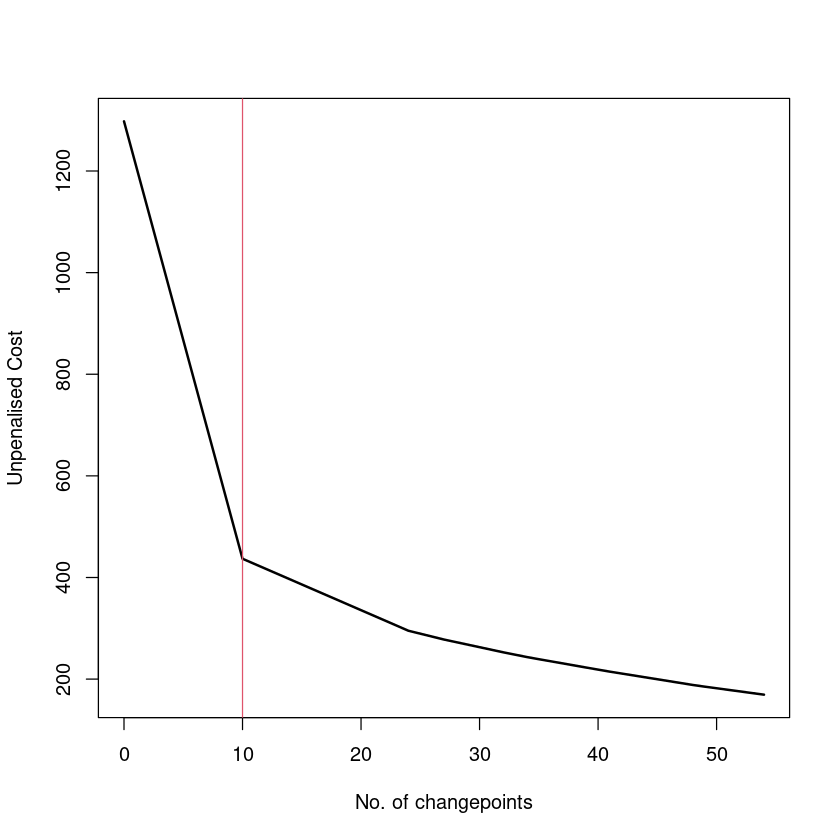

In [16]:
plot(segs[,"m"],segs[,"Qm"],lwd=2,type="l",xlab="No. of changepoints",ylab="Unpenalised Cost")
abline(v=m,col=2)